## TECHIN 513 HW1 – Modifying Signals

Davy Guo

(This should be a markup cell, which means that when you run it you just get formated text.)

In [1]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import simpleaudio as sa
import scipy.io.wavfile as wav
import scipy.signal as sig
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of different amplitude and time operations on signals.  This is a two-week hw.  You should plan on completing the first 2 assignments in the first week.

## HW 1 turn in checklist

•	your Jupyter or Colab notbooks (uploaded as .pdf with your outputs).

Note: You can work together but you need to submit your own work. do not copy paste from each other


## Assignment 1 -- Working with sound files

In [2]:
# Assignment 1 - Working with Sound Files

''' Variables
    path: relative path to working directory
    fs1: sampling rate of original file, 32 kHz
    x1: audio vector of original file
    len1: length of audio vector
    ch1: number of channels of original file
    fs2: sampling rate of mod file, 16 kHz
    fs3: sampling rate of mod file, 48 kHz
'''


# Part A

path = 'sounds/'
fs1, x1 = wav.read(path + 'train32.wav')
len1 = len(x1)
try:
    ch1 = x1.shape[1]
except IndexError:
    ch1 = 1

print(
    f"The train.wav file has {len1} samples with a sampling rate of {fs1}.\n"
    f"It has {ch1} channel{'s' if ch1 != 1 else ''} and the type {x1.dtype}."
)


# Part B

fs2 = int(fs1 / 2)
fs3 = int(1.5 * fs1)

wav.write(path + 'train16.wav', fs2, x1.astype('int16'))
wav.write(path + 'train48.wav', fs3, x1.astype('int16'))


# Part C

def play(file):

    wav_obj = sa.WaveObject.from_wave_file(path + file + '.wav')
    play_obj = wav_obj.play()
    play_obj.wait_done()

play('train32')
play('train16')
play('train48')


The train.wav file has 50313 samples with a sampling rate of 32000.
It has 1 channel and the type int16.


###  Discussion

Comment on how the audio changes when the incorrect sampling frequency is used.

- When the sampling rate is reduced to half, which is 16 kHz, the signal sounds low-pitched and deep.
- When the sampling rate is increased to one and a half, which is 48 kHz, the signal sounds high-pitched and sonorous.


## Assignment 2 -- Amplitude Operations on Signals

In [8]:
# Assignment 2 - Amplitude Operations on Signals

''' Variables
    n0: index of samples at t=0.5
    s1: discrete signal with two values
    v1: audio vector of signal s1
    r1: discrete signal with decaying values
    v2: audio vector of signal s2
'''


# Part A

n0 = int(fs1 * 0.5)
s1 = np.concatenate((np.ones(n0), 0.2 * np.ones(len1 - n0)))
v1 = np.multiply(x1, s1)

wav.write(path + 'train_dampen.wav', fs1, v1.astype('int16'))


# Part B

r1 = np.arange(1, 0, -1 / len1)
v2 = np.multiply(x1, r1)

wav.write(path + 'train_dec.wav', fs1, v2.astype('int16'))


# Part C

play('train32')
play('train_dampen')
play('train_dec')


###  Discussion

Discuss the differences that the two modifications have on the signal. What would happen if you defined s1 to take value 2 for the [0,0.5] range? If you wanted a smooth but faster decay in amplitude, what signal might you use?

- The first modification is made such that the first 0.5s sounds stable at a normal amplitude of 1, while the later part sounds dampened at a lower amplitude of 0.2.
- If the [0,0.5] range has the value 2, the first 0.5s would sound louder as the amplitude is one time higher.
- If I wanted a smooth but faster decay in amplitude, I would use an exponential decay signal, instead of a linear decay.

## Assignment 3 -- Time Scaling Audio Signals 

In [9]:
# Assignment 3 - Time Scaling Function


# Part A

# Start with a comment section that explains what the input and output variables are, e.g.
# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter. This has to be a decimal value for as_integer_ratio to work. 
# So, explicitly casting it into a float or a double or any fractional data type will help.
# returns t: time samples vector corresponding to y: scaled signal

def timescale(x, fs, a):
    # n, d = decimal.Decimal(a).as_integer_ratio()
    [n, d] = (np.double(a)).as_integer_ratio()
    y = sig.resample_poly(x.astype('float'), d, n)  # converts vector x to float type
    t = np.arange(0, len(y), 1) * (1.0 / fs)
    return y, t


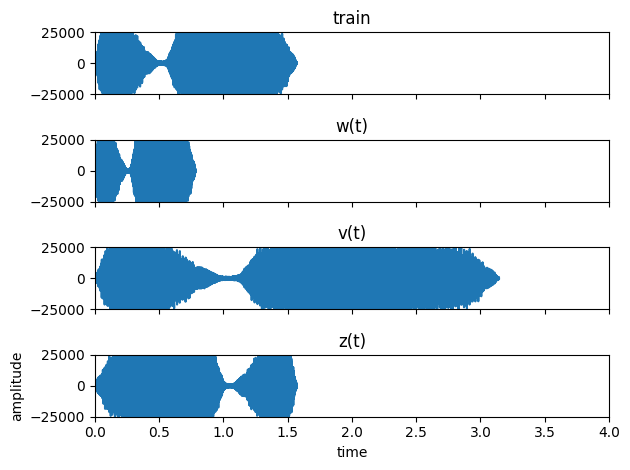

In [10]:
# Assignment 3 -- Time Scaling Audio Signals


# Part B

w, t_w = timescale(x1, fs1, 2)  # creates w(t)
v, t_v = timescale(x1, fs1, 0.5)  # creates v(t)
x1, t_x1 = timescale(x1, fs1, 1)  # returns timescale from original file
z, t_z = np.ascontiguousarray(list(reversed(x1))), t_x1  # creates z(t)

# saves modified signals to wav files
wav.write(path + 'train_0.5x.wav', fs1, w.astype('int16'))
wav.write(path + 'train_2x.wav', fs1, v.astype('int16'))
wav.write(path + 'train_reverse.wav', fs1, z.astype('int16'))


# Part C

fig, axs = plt.subplots(4, sharex=True, sharey=True)  # shares x & y axes
plt.xlim(0.0, 4.0)  # shares x axis limits in 4 sec
plt.ylim(-25000, 25000)  # shares y axis limits of ±25000
plt.xlabel('time')  # shares x axis label
plt.ylabel('amplitude')  # shares y axis label

axs[0].plot(t_x1, x1)  # plots original wav
axs[0].set_title('train')
axs[1].plot(t_w, w)  # plots w(t)
axs[1].set_title('w(t)')
axs[2].plot(t_v, v)  # plots v(t)
axs[2].set_title('v(t)')
axs[3].plot(t_z, z)  # plots z(t)
axs[3].set_title('z(t)')

plt.tight_layout()
plt.show()


# Part D

play('train32')
play('train_0.5x')
play('train_2x')
play('train_reverse')

###  Discussion

Suppose a student runs the figure command before every call to subplot. When you run your script, what changes do you expect to see? How will the plots change?

- Calling `plt.figure()` creates a new figure, on which the waveform is plotted. While this command doesn't apply to my script, I expect it to function with the normal `plt.plot()` plots.
- When the figure command is run, the waveform will be plotted at the position defined in the `plt.subplot()`.
- For example, with `plt.subplot(3, 1, X)`, the results will be three figures, each of which features a plot from top to bottom with corresponding configurations, including `xlim`, `title`, `ylabel`, etc.

## Assignment 4 -- Time Shift Operations

In [9]:
# Assignment 4 - Time Shifting Function


# Part A

# x: input signal vector
# fs: sampling rate (in Hz)
# t0: shifting parameter. Positive value indicates an advance, and negative a delay. 
# n0: integer shift, corresponding to the index of samples given t0 and fs.
# returns t: time samples vector corresponding to y: shifted signal

def timeshift(x, fs, t0):

    n0 = int(abs(t0) * fs)
    if t0 < 0:
        y = np.concatenate((np.zeros(n0), x))
    elif t0 > 0:
        y = np.concatenate((x[n0:], np.zeros(n0)))
    else:
        y = x
    t = np.arange(0, len(y), 1) * (1.0 / fs)
    return y, t

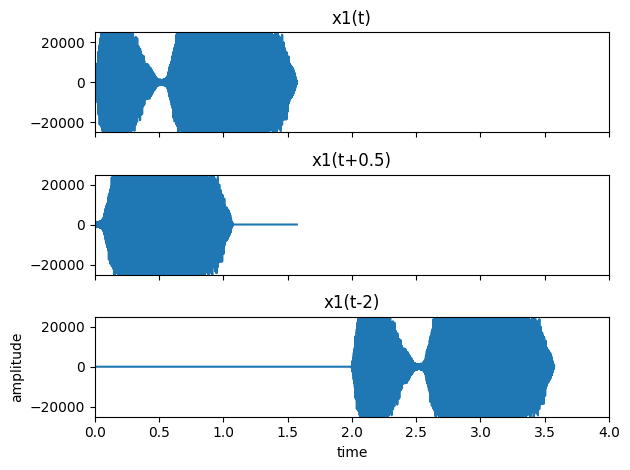

In [10]:
# Assignment 4 - Time Shifting Audio Signals


# Part B

dl, t_dl = timeshift(x1, fs1, 0.5)  # creates delayed signal
ad, t_ad = timeshift(x1, fs1, -2)  # creates advanced signal
x1, t_x1 = timeshift(x1, fs1, 0)  # returns timescale from original file

# saves modified signals to wav files
wav.write(path + 'train_+0.5.wav', fs1, dl.astype('int16'))
wav.write(path + 'train_-2.wav', fs1, ad.astype('int16'))

fig, axs = plt.subplots(3, sharex=True, sharey=True)
plt.xlim(0.0, 4.0)
plt.ylim(-25000, 25000)
plt.xlabel('time')
plt.ylabel('amplitude')

axs[0].plot(t_x1, x1)
axs[0].set_title('x1(t)')  # plots original wav
axs[1].plot(t_dl, dl)
axs[1].set_title('x1(t+0.5)')  # plots delayed signal
axs[2].plot(t_ad, ad)
axs[2].set_title('x1(t-2)')  # plots advanced signal

plt.tight_layout()
plt.show()


# Part C

play('train32')
play('train_+0.5')
play('train_-2')

### Discussion

There is a trivial case that you should ideally test for. If the shift is zero, then the output is the original signal. If the shift is an advance bigger than the original signal, then the output will be zero. Comment on whether your current implementation correctly handles these cases and whether there is a better implementation.

- The current implementation satisfies the requirements and handles the edge cases from the question, where the shift is zero or is an advance bigger than the original signal.
- That said, although the requirements are fulfilled, there should be better implementation. For one, when the advance is bigger than the entire signal, a new zero vector is created; when it's not, the part after n0 is sliced. But these wouldn't be as good as shifting the entire signal leftward, leaving it intact.


In [13]:
# Bonus Assignment

fs, cat = wav.read(path + 'cat.wav')
fs, cow = wav.read(path + 'cow.wav')

cat_amp = np.multiply(cat, 10 * np.ones(len(cat)))
cow_fast = timescale(cow, fs, 3)
cat_dl = timeshift(cat_amp, fs, 1)
cow_ad = timeshift(cow_fast, fs, -1)

linear = np.concatenate((cat_amp, cow_fast[0]))
delay = np.concatenate((cat_dl[0], cow))

decay = np.arange(1, 0, -1 / len(delay))
delay_dmp = np.multiply(delay, decay)

synth = np.concatenate((linear, delay_dmp))
wav.write(path + 'synth.wav', fs, synth.astype('int16'))